# Palmer Penguins

Let's take a gander at the penguins dataset:

In [4]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's clean and visualise our variables of interest:

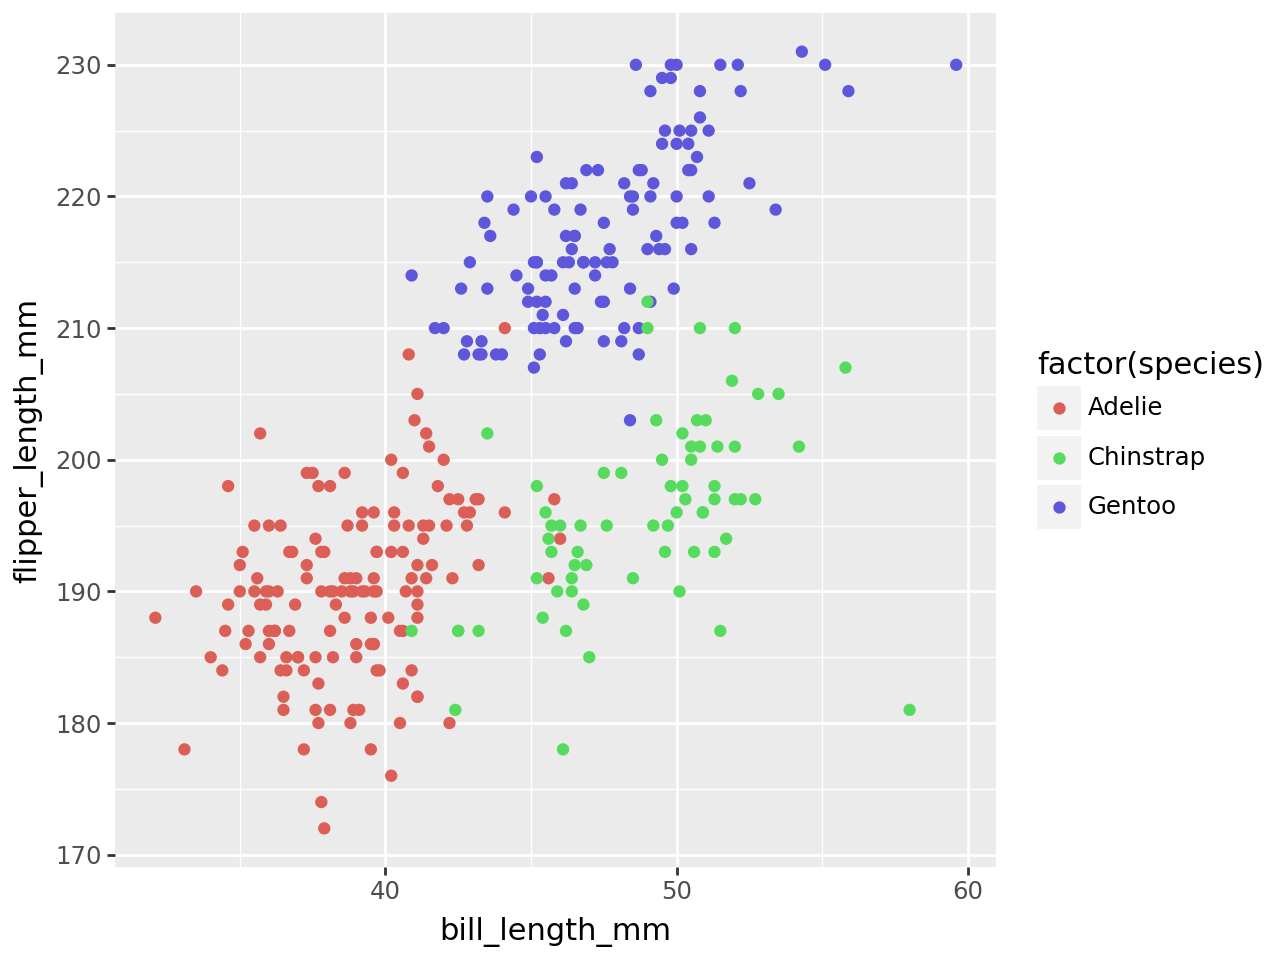

In [5]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

# Drop rows with missing values
penguins_cleaned = penguins.dropna()

(
    ggplot(penguins_cleaned, aes("bill_length_mm",
           "flipper_length_mm", color="factor(species)"))
    + geom_point()
)

## KMeans clustering

Let's see if these two variables are sufficient to identify penguin species with KMeans.

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_features = ["bill_length_mm", "flipper_length_mm"]

features = penguins_cleaned.loc[:, selected_features]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
# poor model kmeans = KMeans(n_clusters=3, algorithm="elkan", n_init=1, max_iter=1)

# TODO: Get help on SettingWithCopyWarning error
penguin_predictions = kmeans.fit_predict(features_scaled)
penguins_cleaned.loc[:, "cluster"] = penguin_predictions

/tmp/ipykernel_42794/99481008.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Let's match up the clusters to the species by the cluster containing most predictions

In [7]:
cluster_species = penguins_cleaned.groupby(
    "species")["cluster"].agg(lambda x: x.value_counts().index[0])

cluster_species_df = cluster_species.reset_index()

penguins_cleaned['cluster'] = penguins_cleaned['cluster'].astype(str)
cluster_species_df['cluster'] = cluster_species_df['cluster'].astype(str)

penguins_cleaned.loc[:, "cluster"] = penguins_cleaned["cluster"].map(
    cluster_species_df.set_index("cluster")["species"])

/tmp/ipykernel_42794/591248233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Let's now visualise how well the clustering worked:

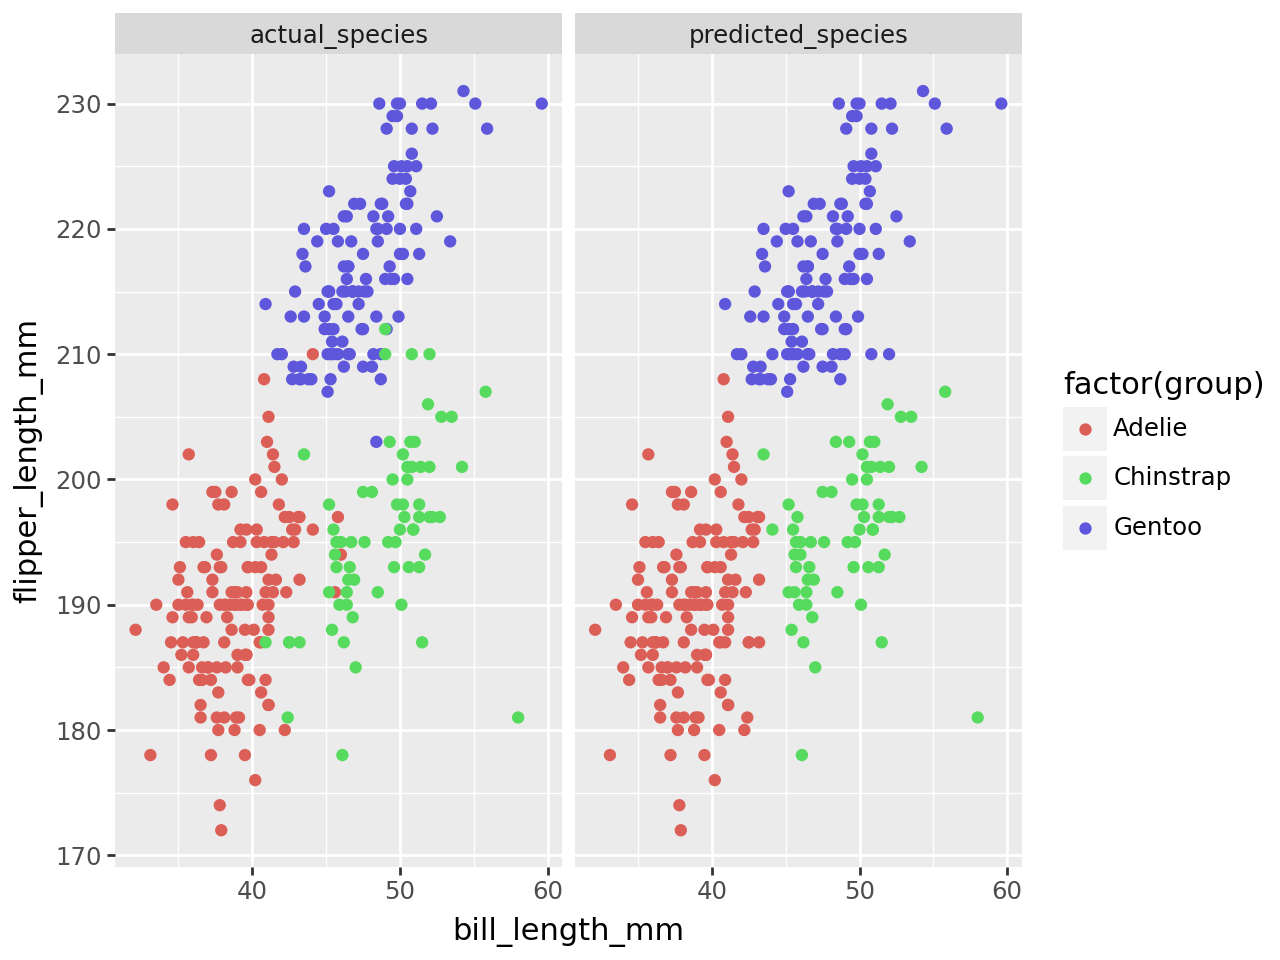

In [8]:
cols_compare = ["species",
                "cluster", "bill_length_mm", "flipper_length_mm"]
penguins_selected = penguins_cleaned[cols_compare]

penguins_selected = penguins_selected.rename(columns={
    "species": "actual_species", "cluster": "predicted_species"})

penguins_clust_long = pd.melt(penguins_selected,
                              id_vars=["bill_length_mm", "flipper_length_mm"],
                              var_name="measure",
                              value_name="group")

(
    ggplot(penguins_clust_long, aes("bill_length_mm",
           "flipper_length_mm", color="factor(group)"))
    + geom_point()
    + facet_wrap("measure")
)

# Slow notebooks

The cells below were generated by copying and pasting the cells from the plain text file. The instructor then collapsed the group of cells before recording began.

In [9]:
from lorem_text import lorem
import random
import time
from plotnine import geom_tile, scale_fill_gradient, theme_minimal, labs

matrix_size = 500
random_data_df = pd.DataFrame(
    np.random.randint(0, 10, size=(matrix_size, matrix_size)))

# Melt the DataFrame for plotting
df_melted = random_data_df.stack().reset_index()
df_melted.columns = ['x', 'y', 'value']

paragraph_length = 10


def insert_new_lines(text, n):
  return '\n'.join([text[i:i+n] for i in range(0, len(text), n)])

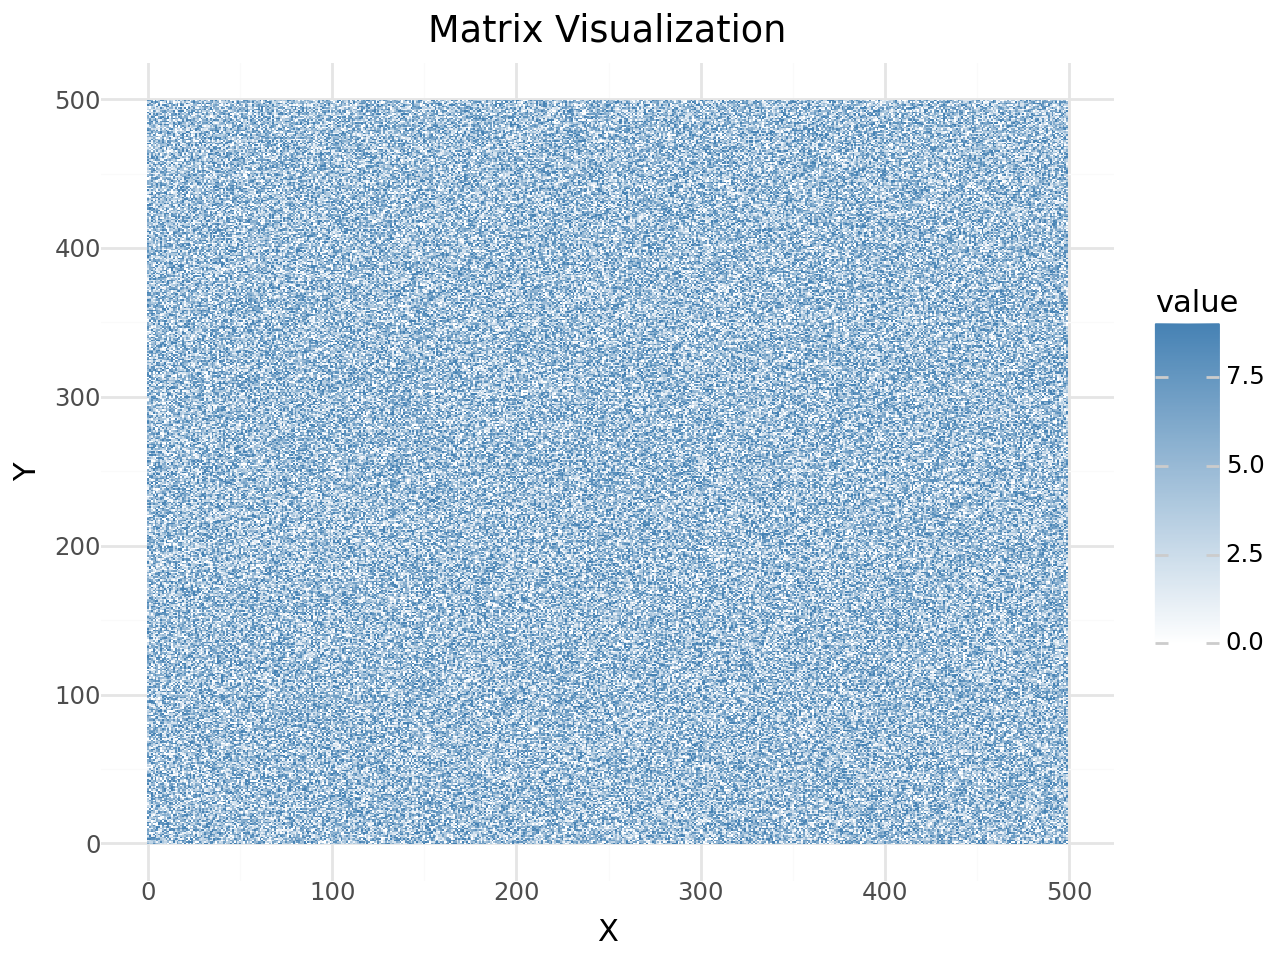

In [10]:

# Create the plot
(ggplot(df_melted, aes(x='x', y='y', fill='value'))
 + geom_tile()
 + scale_fill_gradient(low="white", high="steelblue")
 + theme_minimal()
 + labs(x="X", y="Y", title="Matrix Visualization"))

In [51]:
print(insert_new_lines(lorem.paragraphs(5), 50))

Lorem ipsum dolor sit amet, consectetur adipisicin
g elit, sed do eiusmod tempor incididunt ut labore
 et dolore magna aliqua. Ut enim ad minim veniam, 
quis nostrud exercitation ullamco laboris nisi ut 
aliquip ex ea commodo consequat. Duis aute irure d
olor in reprehenderit in voluptate velit esse cill
um dolore eu fugiat nulla pariatur. Excepteur sint
 occaecat cupidatat non proident, sunt in culpa qu
i officia deserunt mollit anim id est laborum.
Com
modi sed maiores ad unde reiciendis placeat dignis
simos, quas dolorem nihil fugit, porro repellendus
 maiores facere aperiam quos tempore quis quo illo
, sint dolore aliquam ad sunt repellat earum dolor
es iure praesentium corrupti cum, hic similique pe
rferendis quod sapiente quia odit reiciendis susci
pit? Quis eveniet tempore molestiae at minima maxi
me quisquam porro dolor nam non, autem ratione qua
si enim deserunt. Facilis autem minima a quo minus
 placeat voluptatum officia pariatur laborum, sapi
ente exercitationem sunt possim